## Group 7

- Lama Alzahrani
- Mashael Alhussan
- Zarah Shibli
- Wajd Alturki

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install kaggle
!mkdir ~/.kaggle 
!touch ~/.kaggle/kaggle.json

import json
import zipfile
import os
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d vjchoudhary7/hr-analytics-case-study

with zipfile.ZipFile('/content/hr-analytics-case-study.zip') as zip_ref:
  zip_ref.extractall('dataset')

 


mkdir: cannot create directory ‘/root/.kaggle’: File exists
hr-analytics-case-study.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
df_general = pd.read_csv('/content/dataset/general_data.csv')
df_employee = pd.read_csv('/content/dataset/employee_survey_data.csv')
df_manager = pd.read_csv('/content/dataset/manager_survey_data.csv')

In [ ]:
df_general.shape , df_employee.shape, df_manager.shape

((4410, 24), (4410, 4), (4410, 3))

In [ ]:
df_general.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [ ]:
df_employee.columns

Index(['EmployeeID', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance'],
      dtype='object')

In [ ]:
df_manager.columns

Index(['EmployeeID', 'JobInvolvement', 'PerformanceRating'], dtype='object')

### Merge data

In [ ]:
df = df_general.merge(df_employee).merge(df_manager)
df.shape

(4410, 29)

In [ ]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
dtype: int64

Text(0.5, 0, 'Number of people')

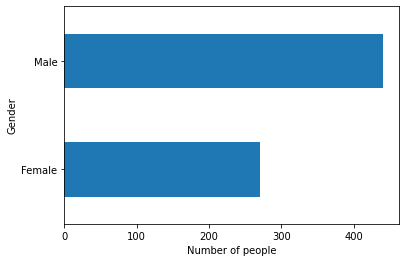

In [ ]:
df.groupby(['Gender'])['Attrition'].value_counts().loc[:, 'Yes'].plot(kind="barh",orientation="horizontal")
plt.xlabel('Number of people')

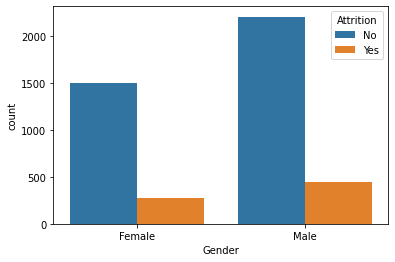

In [ ]:
sns.countplot(data = df, x= 'Gender', hue='Attrition');


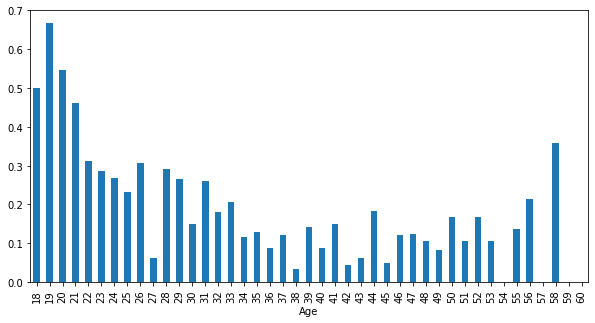

In [ ]:
plt.figure(figsize=(10,5))

df.groupby(['Age'])['Attrition'].value_counts(normalize=True).unstack().loc[:, 'Yes'].plot(kind='bar')


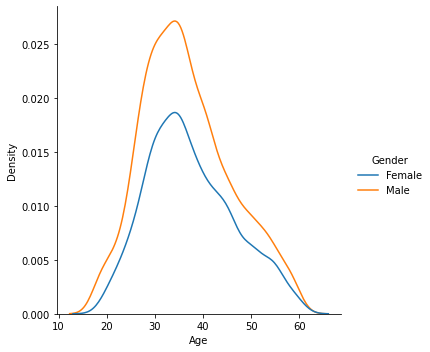

In [ ]:
sns.displot(data=df, x="Age",  hue="Gender",  kind="kde")
plt.xlabel("Age");


#### **Counts of employees based on the Business Travel Types**

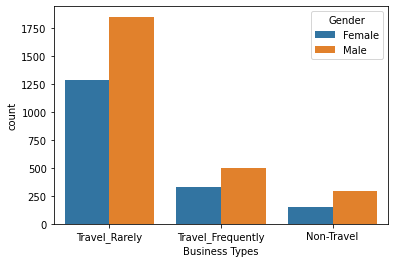

In [ ]:
# count of employees based on the Business Travel Types
sns.countplot(data = df, x= 'BusinessTravel', hue='Gender')
plt.xlabel("Business Types");

In [ ]:
Business_Travel_name = [(x.replace('_',' ')) for x in df['BusinessTravel'].value_counts(normalize=True).index ]
Business_Travel_value = [ "%.2f" %( float(x)*100) for x in df['BusinessTravel'].value_counts(normalize=True).values ]

#############

Attrition_BusinessTravel = df.groupby(['BusinessTravel'])['Attrition'].value_counts(normalize=True).unstack().loc[:, 'Yes']
Attrition_BusinessTravel_name = [(x.replace('_',' ')) for x in Attrition_BusinessTravel.index ]
Attrition_BusinessTravel_value = [ "%.2f" %( float(x)*100) for x in Attrition_BusinessTravel.values ]


In [ ]:
print('Travel Types Percentages:') 
print(' ----------------------------------------')
[print(i,' per.: ',j,' %') for i,j in zip(Business_Travel_name, Business_Travel_value)]
print('')
print('Resign Ratios by Travel Frequency: ')
print(' ----------------------------------------')
[print(i,' per.: ',j,' %') for i,j in zip(Attrition_BusinessTravel_name, Attrition_BusinessTravel_value)]
print('')

Travel Types Percentages:
 ----------------------------------------
Travel Rarely  per.:  70.95  %
Travel Frequently  per.:  18.84  %
Non-Travel  per.:  10.20  %

Resign Ratios by Travel Frequency: 
 ----------------------------------------
Non-Travel  per.:  8.00  %
Travel Frequently  per.:  24.91  %
Travel Rarely  per.:  14.96  %



#### **Counts of employees in each department based on the Attrition**

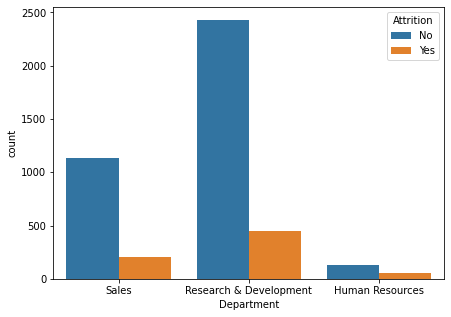

In [ ]:
# Counts of employees in each department based on the Attrition
plt.figure(figsize=(7,5))
sns.countplot(data = df, x= 'Department', hue='Attrition');


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,1,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,1,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,0,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,0,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,0,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [ ]:
df.dropna(inplace=True)


In [ ]:
df.isna().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
PerformanceRating          0
dtype: int64

In [ ]:

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(df[['Gender', 'Attrition']])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='ignore', sparse=True)

In [ ]:
enc.transform(df[['Gender', 'Attrition']]).toarray()

array([[1., 0., 1., 0.],
       [1., 0., 0., 1.],
       [0., 1., 1., 0.],
       ...,
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.]])

In [ ]:
# convert gender to numiric 
df.Gender = df.Gender.map(dict(Female=1, Male=0))


In [ ]:
df.describe(exclude='number')

,Attrition,BusinessTravel,Department,EducationField,JobRole,MaritalStatus,Over18
count,4300,4300,4300,4300,4300,4300,4300
unique,2,3,3,6,9,3,1
top,No,Travel_Rarely,Research & Development,Life Sciences,Sales Executive,Married,Y
freq,3605,3051,2807,1766,956,1969,4300


In [ ]:
ls = ['BusinessTravel','Department','EducationField','JobRole','MaritalStatus','Over18']
for i in ls:
  df[i] = df[i].astype('category').cat.codes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4300 entries, 0 to 4408
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4300 non-null   int64  
 1   Attrition                4300 non-null   object 
 2   BusinessTravel           4300 non-null   int8   
 3   Department               4300 non-null   int8   
 4   DistanceFromHome         4300 non-null   int64  
 5   Education                4300 non-null   int64  
 6   EducationField           4300 non-null   int8   
 7   EmployeeCount            4300 non-null   int64  
 8   EmployeeID               4300 non-null   int64  
 9   Gender                   4300 non-null   int64  
 10  JobLevel                 4300 non-null   int64  
 11  JobRole                  4300 non-null   int8   
 12  MaritalStatus            4300 non-null   int8   
 13  MonthlyIncome            4300 non-null   int64  
 14  NumCompaniesWorked      

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = pd.get_dummies(df.loc[:,df.columns != "Attrition"]) #feature matrix
y = df.Attrition# target vector

# standard scaled X matrix
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

X_train, X_test, y_train, y_test =  train_test_split(X_std, y, test_size=0.20, random_state=111, stratify = y)

# creating logistic regression object
from sklearn.linear_model import LogisticRegression

# Logistic Regression

logreg = LogisticRegression()

# Create regularization penalty space
penalty = ['l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# creating grid search with 5 fold
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(logreg, hyperparameters, cv=5, verbose=0)

# fit grid search on data
model = clf.fit(X,y)

# view best parameters 
print('Best Penalty:', model.best_estimator_.get_params()['penalty'])
print('Best C:', model.best_estimator_.get_params()['C'])

# calculate test score
from sklearn import metrics

model = model.best_estimator_.fit(X_train, y_train)

# predictions for test set
y_preds = model.predict(X_test)

test_accuracy_log = metrics.accuracy_score(y_test, y_preds)
test_recall_log = metrics.recall_score(y_test, y_preds,pos_label='Yes')
print('Test Accuracy:', test_accuracy_log)
print('Test Sensitivity:', test_recall_log)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Best Penalty: l2
Best C: 1.0
Test Accuracy: 0.8488372093023255
Test Sensitivity: 0.17266187050359713


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
